NAMA ANGGOTA:
1.   NAUFAL EL KAMIL ADITYA PRATAMA RAHMAN - 2211102012
2.   SALSABILA SEPTI SUKMAYANTI - 2211102006

#📌 STRATEGI ALGORITMA

In [ ]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 3.4 MB/s eta 0:00:00


In [ ]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 55.6 MB/s eta 0:00:00


In [ ]:
pip install haversine

In [ ]:
# Import Library
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from geopy.distance import geodesic
import geopandas as gpd
import itertools
import contextily as cx
from shapely.geometry import Point, LineString
from haversine import haversine


##Langsung pilih lokasi yaitu BANYUMAS

In [ ]:
# Mengumpulkan informasi geografis tentang Kab banyumas
kabupaten = ox.geocode_to_gdf("Banyumas, Jawa Tengah, Indonesia")

# Menampilkan informasi yang dikumpulkan
print(kabupaten.head())

                                            geometry   bbox_west  bbox_south  \
0  POLYGON ((108.89131 -7.44891, 108.89136 -7.449...  108.891311   -7.663945   

    bbox_east  bbox_north  place_id  osm_type   osm_id       lat         lon  \
0  109.445834   -7.246292  27008493  relation  9686820 -7.455072  109.116746   

      class            type  place_rank  importance addresstype      name  \
0  boundary  administrative          12    0.479602      county  Banyumas   

                              display_name  
0  Banyumas, Central Java, Java, Indonesia  


In [ ]:
kabupaten.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

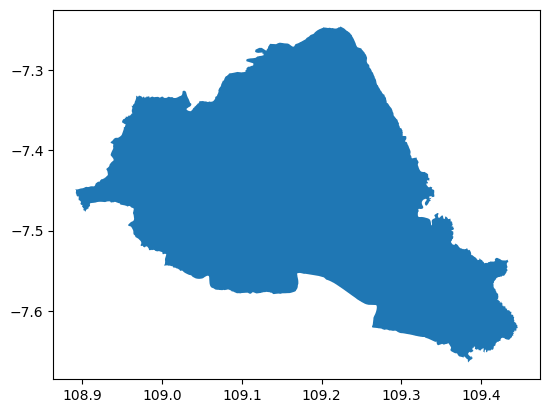

In [ ]:
# Plot data
kabupaten.plot()

##Contoh Mencari Beberapa Kabupaten

In [ ]:
# Mencari dan mendapatkan beberapa tempat sekaligus
List_kabupaten = [
    "Cilacap, Central Java, Indonesia",
    "Purbalingga, Central Java, Indonesia",
    "Banjarnegara, Central Java, Indonesia",
    "Brebes, Central Java, Indonesia",
    "Tegal, Central Java, Indonesia",
    "Banyumas, Central Java, Indonesia"
]

In [ ]:
#Menggunakan function yang sama namun mengganti inputnya menjadi List_City
Beberapa_kabupaten = ox.geocode_to_gdf(List_kabupaten)
Beberapa_kabupaten.head()

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((108.55585 -7.28859, 108.55614 -7.289...",108.555855,-7.784624,109.395500,-7.138725,26937906,relation,9686822,-7.461671,108.804615,boundary,administrative,12,0.478568,county,Cilacap,"Cilacap, Central Java, Java, Indonesia"
1,"POLYGON ((109.22367 -7.24629, 109.22459 -7.246...",109.223671,-7.493500,109.584518,-7.161180,27043148,relation,9686819,-7.327330,109.399899,boundary,administrative,12,0.452167,county,Purbalingga,"Purbalingga, Central Java, Java, Indonesia"
2,"POLYGON ((109.36142 -7.48632, 109.36146 -7.486...",109.361420,-7.540750,109.917725,-7.171164,27036590,relation,9686816,-7.355873,109.660073,boundary,administrative,12,0.462117,county,Banjarnegara,"Banjarnegara, Central Java, Java, Indonesia"
3,"POLYGON ((108.69297 -7.15167, 108.69341 -7.152...",108.692974,-7.351615,109.175492,-6.752419,26920837,relation,9686821,-7.052071,108.888136,boundary,administrative,12,0.466593,county,Brebes,"Brebes, Central Java, Java, Indonesia"
4,"POLYGON ((109.075 -6.8809, 109.07507 -6.88128,...",109.074997,-6.900017,109.161961,-6.839489,28079150,relation,9686828,-6.869811,109.115065,boundary,administrative,12,0.476448,county,Tegal,"Tegal, Central Java, Java, Indonesia"


<Axes: >

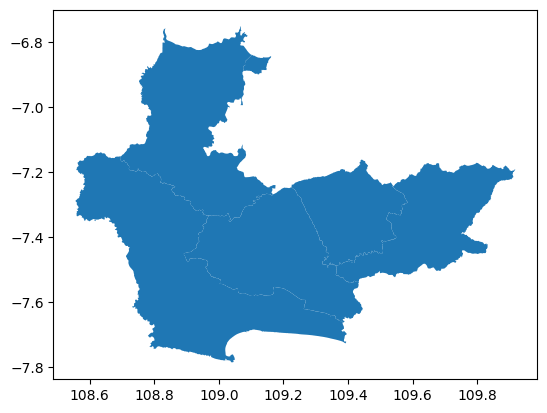

In [ ]:
# Plot peta
Beberapa_kabupaten.plot()

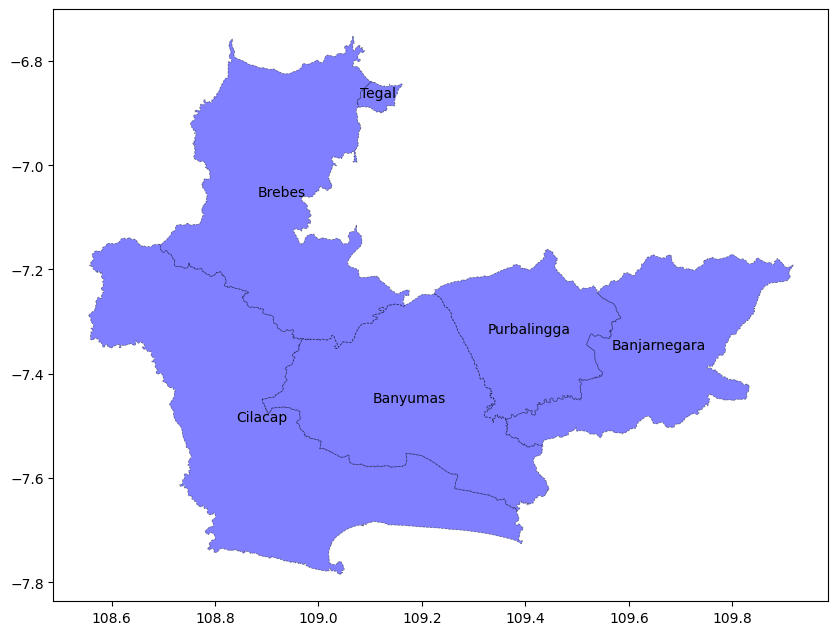

In [ ]:
# Plot peta dan display Label name
fig, ax = plt.subplots(figsize=(10, 10))
Beberapa_kabupaten.plot(ax=ax, color='blue', alpha=0.5, linestyle='--', linewidth=0.5, edgecolor='black')

for idx, row in Beberapa_kabupaten.iterrows():
    plt.annotate(text=row['name'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=10, color='black')

plt.show()

##PILIH LOKASI 10 SEKOLAH DI BANYUMAS

<ipython-input-13-b7e3e2196808>:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sekolah['lon'] = sekolah.geometry.centroid.x
<ipython-input-13-b7e3e2196808>:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sekolah['lat'] = sekolah.geometry.centroid.y
<ipython-input-13-b7e3e2196808>:24: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


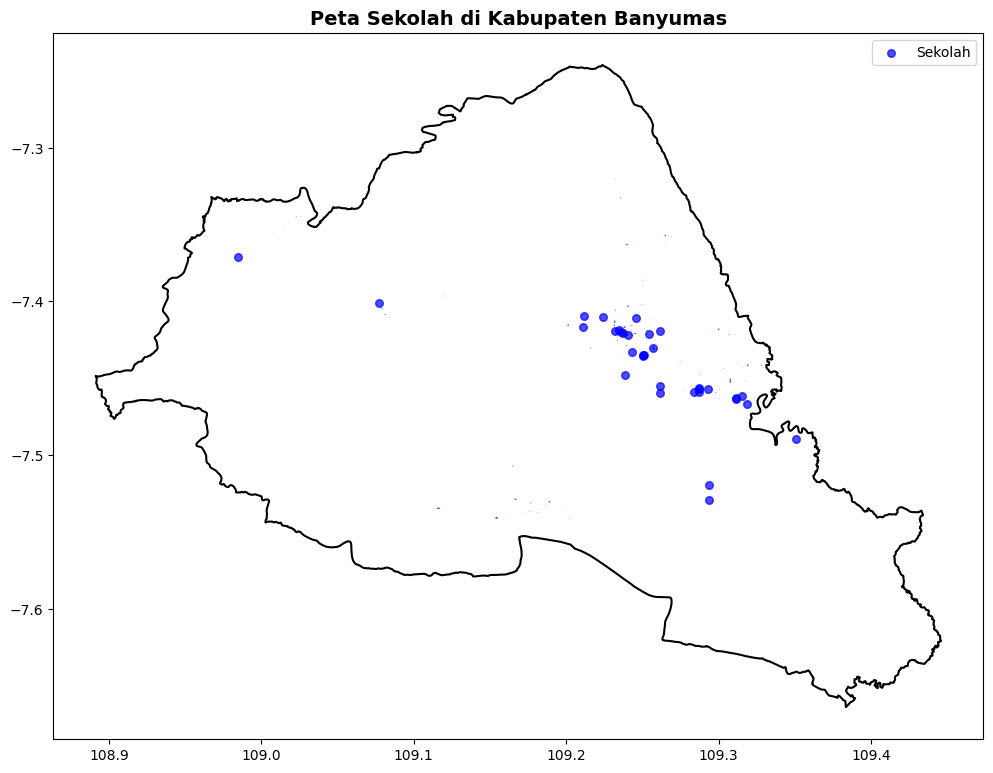

In [ ]:
place_name = "Banyumas, Jawa Tengah, Indonesia"
tag_amenity = {'amenity': 'school'}

kabupaten = ox.geocode_to_gdf(place_name)
sekolah = ox.features_from_place("Banyumas, Indonesia", tags=tag_amenity)

sekolah = sekolah.to_crs(epsg=4326)

# Ambil koordinat sekolah
sekolah['lon'] = sekolah.geometry.centroid.x
sekolah['lat'] = sekolah.geometry.centroid.y

# Buat plot batas Kabupaten dan titik sekolah
fig, ax = plt.subplots(figsize=(12, 10))

# Plot batas Kabupaten Banyumas
kabupaten.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1.5, label="Batas Kabupaten Banyumas")

# Plot sekolah
sekolah.plot(ax=ax, marker='o', color='blue', markersize=30, label="Sekolah", alpha=0.7)

# Tambahkan judul dan legenda
ax.set_title("Peta Sekolah di Kabupaten Banyumas", fontsize=14, fontweight='bold')
ax.legend()

plt.show()


In [ ]:
# Mendapatkan bounding box dalam urutan yang benar
west, south, east, north = kabupaten.total_bounds

print(f"North: {north}, South: {south}, East: {east}, West: {west}")

North: -7.2462921, South: -7.6639446, East: 109.4458343, West: 108.8913111


In [ ]:
# Mendefinisikan bounding box untuk wilayah di Banyumas
north, south, east, west = -7.2462921, -7.6639446, 109.4458343, 108.8913111

# Mendapatkan objek bangunan dalam cakupan wilayah tersebut
building_bbox = ox.features.features_from_bbox((west, south, east, north), tags={'building': True})

print(building_bbox.shape)

(822766, 143)


In [ ]:
building_bbox.head()

geometry building           amenity  \
element id                                                                  
node    1448608332  POINT (109.23622 -7.42534)      yes               NaN   
        1887657631  POINT (109.29846 -7.45788)      yes  place_of_worship   
        2006020429  POINT (109.24238 -7.42907)   public               NaN   
        2047440108  POINT (109.01757 -7.34923)   mosque  place_of_worship   
        2817178267  POINT (109.28721 -7.45572)   office               NaN   

                   denomination                               name  \
element id                                                           
node    1448608332          NaN                    Gedhe Institute   
        1887657631          NaN      Klenteng Hok Tek Bio Sokaraja   
        2006020429          NaN    Purwokerto Kulon Community Hall   
        2047440108        sunni                      Masjid Bribis   
        2817178267          NaN  Kantor Kepala Desa Sokaraja Kulon   

                   opening_hours  religion                     addr:housename  \
element id                                                                      
node    1448608332           NaN       NaN                      Wisma Merdeka   
        1887657631           NaN  buddhist                                NaN   
        2006020429           NaN       NaN  Kantor Kelurahan Purwokerto Kulon   
        2047440108          24/7    muslim                                NaN   
        2817178267           NaN       NaN                                NaN   

                   addr:housenumber     addr:street  ...  ref note level  \
element id                                           ...                   
node    1448608332               17   Jalan Merdeka  ...  NaN  NaN   NaN   
        1887657631              NaN             NaN  ...  NaN  NaN   NaN   
        2006020429              NaN  Jalan Situmpur  ...  NaN  NaN   NaN   
        2047440108              NaN             NaN  ...  NaN  NaN   NaN   
        2817178267              NaN             NaN  ...  NaN  NaN   NaN   

                   police:type_idn architect grades outdoor_seating  \
element id                                                            
node    1448608332             NaN       NaN    NaN             NaN   
        1887657631             NaN       NaN    NaN             NaN   
        2006020429             NaN       NaN    NaN             NaN   
        2047440108             NaN       NaN    NaN             NaN   
        2817178267             NaN       NaN    NaN             NaN   

                   industrial house type  
element id                                
node    1448608332        NaN   NaN  NaN  
        1887657631        NaN   NaN  NaN  
        2006020429        NaN   NaN  NaN  
        2047440108        NaN   NaN  NaN  
        2817178267        NaN   NaN  NaN  

[5 rows x 143 columns]

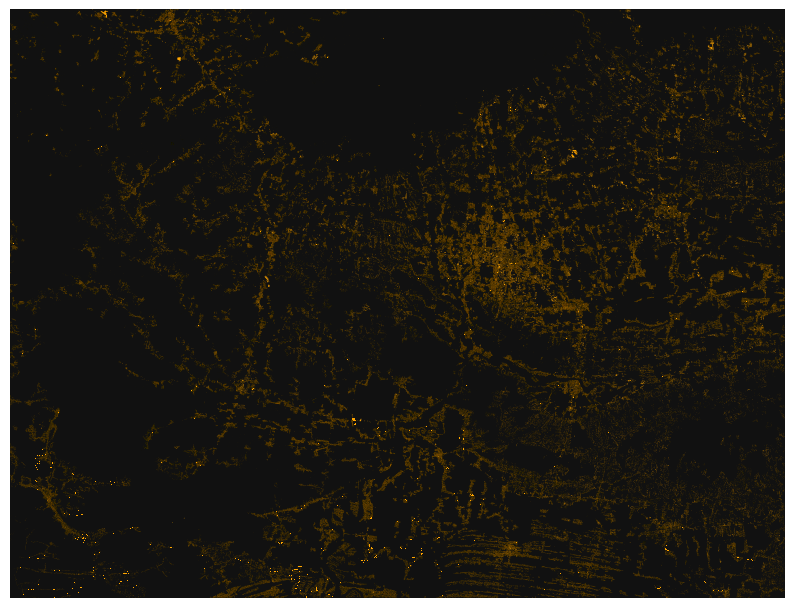

In [ ]:
fix, ax = ox.plot_footprints(building_bbox, figsize=(10,10))

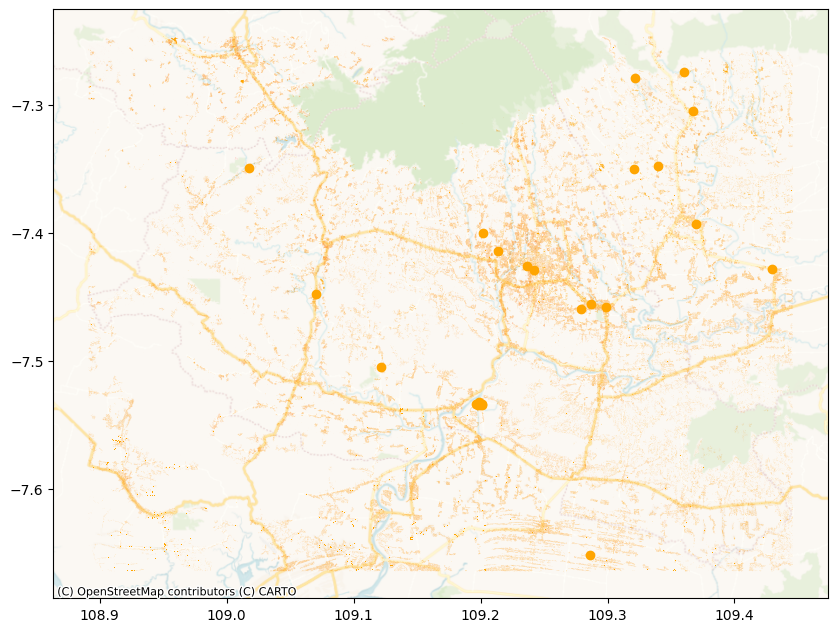

In [ ]:
# setup figure and axis
fig, ax = plt.subplots(1, figsize=(10, 8))

# plot building
building_bbox.plot(
    ax=ax,
    color="orange"
)

# menambahkan basemap
cx.add_basemap(
    ax,
    crs='EPSG:4326',
    source=cx.providers.CartoDB.VoyagerNoLabels
)

plt.show()

In [ ]:
# Data 10 sekolah
sekolah_locations = [
    ("SMA Negeri 1 Purwokerto", 109.2347, -7.4245),
    ("SMA Negeri 2 Purwokerto", 109.2442, -7.4250),
    ("SMA Negeri 3 Purwokerto", 109.2531, -7.4291),
    ("SMK Negeri 1 Purwokerto", 109.2484, -7.4276),
    ("SMK Negeri 2 Purwokerto", 109.2425, -7.4233),
    ("SMP Negeri 1 Purwokerto", 109.2478, -7.4220),
    ("SMP Negeri 2 Purwokerto", 109.2500, -7.4212),
    ("SD Negeri 1 Karanglewas", 109.2395, -7.4301),
    ("SD Negeri 2 Purwokerto", 109.2453, -7.4284),
    ("MI Al-Irsyad Al-Islamiyyah", 109.2439, -7.4267),
]

<ipython-input-20-bdd11ee43cbd>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(sekolah_locations)).colors
<ipython-input-20-bdd11ee43cbd>:6: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf_sekolah["geometry"] = gdf_sekolah.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)


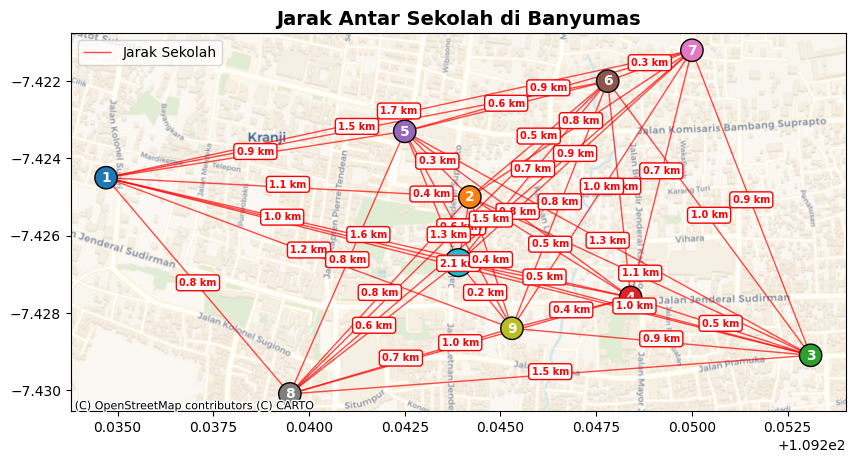

In [ ]:
# Warna untuk setiap titik sekolah
colors = plt.cm.get_cmap("tab10", len(sekolah_locations)).colors

# Konversi ke GeoDataFrame (untuk titik sekolah)
gdf_sekolah = gpd.GeoDataFrame(sekolah_locations, columns=["name", "longitude", "latitude"])
gdf_sekolah["geometry"] = gdf_sekolah.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)
gdf_sekolah = gdf_sekolah.set_crs(epsg=4326)

# Buat garis antar semua titik sekolah dengan jarak
lines = []
distances = []
for i in range(len(sekolah_locations)):
    for j in range(i + 1, len(sekolah_locations)):
        point1 = Point(sekolah_locations[i][1], sekolah_locations[i][2])
        point2 = Point(sekolah_locations[j][1], sekolah_locations[j][2])
        lines.append(LineString([point1, point2]))

        # Hitung jarak dalam km
        jarak_km = geodesic((point1.y, point1.x), (point2.y, point2.x)).kilometers
        distances.append((i+1, j+1, jarak_km))

# Konversi ke GeoDataFrame untuk garis
gdf_lines = gpd.GeoDataFrame(geometry=lines, crs="EPSG:4326")

# Setup figure
fig, ax = plt.subplots(figsize=(10, 10))

# Plot garis penghubung antar sekolah
gdf_lines.plot(ax=ax, color='red', linewidth=1, alpha=0.7, label="Jarak Sekolah")

# Plot titik lokasi sekolah (dengan warna berbeda)
for i, (name, lon, lat) in enumerate(sekolah_locations):
    ax.scatter(lon, lat, c=[colors[i]], s=100, edgecolors="black", zorder=3)
    ax.text(lon, lat, str(i + 1), fontsize=10, ha='center', va='center',
            color='white', fontweight='bold', bbox=dict(facecolor=colors[i], edgecolor='black', boxstyle='circle'))

# Menambahkan label jarak di tengah garis penghubung
for (num1, num2, jarak_km) in distances:
    point1 = sekolah_locations[num1-1]
    point2 = sekolah_locations[num2-1]
    mid_x, mid_y = (point1[1] + point2[1]) / 2, (point1[2] + point2[2]) / 2
    ax.text(mid_x, mid_y, f"{jarak_km:.1f} km", fontsize=7, color="red", ha="center",
            fontweight="bold", bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))

# Tambahkan basemap
cx.add_basemap(ax, crs=gdf_sekolah.crs.to_string(), source=cx.providers.CartoDB.Voyager)

plt.title("Jarak Antar Sekolah di Banyumas", fontsize=14, fontweight="bold")
plt.legend()
plt.show()

In [ ]:
print("\n📍 Daftar Sekolah:")
for i, (name, _, _) in enumerate(sekolah_locations):
    print(f"{i+1}. {name}")

print("\n🔗 Jarak Antar Sekolah:")
for num1, num2, jarak_km in distances:
    print(f"{num1} ↔ {num2}: {jarak_km:.2f} km")


📍 Daftar Sekolah:
1. SMA Negeri 1 Purwokerto
2. SMA Negeri 2 Purwokerto
3. SMA Negeri 3 Purwokerto
4. SMK Negeri 1 Purwokerto
5. SMK Negeri 2 Purwokerto
6. SMP Negeri 1 Purwokerto
7. SMP Negeri 2 Purwokerto
8. SD Negeri 1 Karanglewas
9. SD Negeri 2 Purwokerto
10. MI Al-Irsyad Al-Islamiyyah

🔗 Jarak Antar Sekolah:
1 ↔ 2: 1.05 km
1 ↔ 3: 2.09 km
1 ↔ 4: 1.55 km
1 ↔ 5: 0.87 km
1 ↔ 6: 1.47 km
1 ↔ 7: 1.73 km
1 ↔ 8: 0.82 km
1 ↔ 9: 1.25 km
1 ↔ 10: 1.04 km
2 ↔ 3: 1.08 km
2 ↔ 4: 0.55 km
2 ↔ 5: 0.27 km
2 ↔ 6: 0.52 km
2 ↔ 7: 0.77 km
2 ↔ 8: 0.77 km
2 ↔ 9: 0.40 km
2 ↔ 10: 0.19 km
3 ↔ 4: 0.54 km
3 ↔ 5: 1.33 km
3 ↔ 6: 0.98 km
3 ↔ 7: 0.94 km
3 ↔ 8: 1.51 km
3 ↔ 9: 0.86 km
3 ↔ 10: 1.05 km
4 ↔ 5: 0.81 km
4 ↔ 6: 0.62 km
4 ↔ 7: 0.73 km
4 ↔ 8: 1.02 km
4 ↔ 9: 0.35 km
4 ↔ 10: 0.51 km
5 ↔ 6: 0.60 km
5 ↔ 7: 0.86 km
5 ↔ 8: 0.82 km
5 ↔ 9: 0.64 km
5 ↔ 10: 0.41 km
6 ↔ 7: 0.26 km
6 ↔ 8: 1.28 km
6 ↔ 9: 0.76 km
6 ↔ 10: 0.67 km
7 ↔ 8: 1.52 km
7 ↔ 9: 0.95 km
7 ↔ 10: 0.91 km
8 ↔ 9: 0.67 km
8 ↔ 10: 0.61 km
9 ↔ 10: 0.24 km


##Brute Force

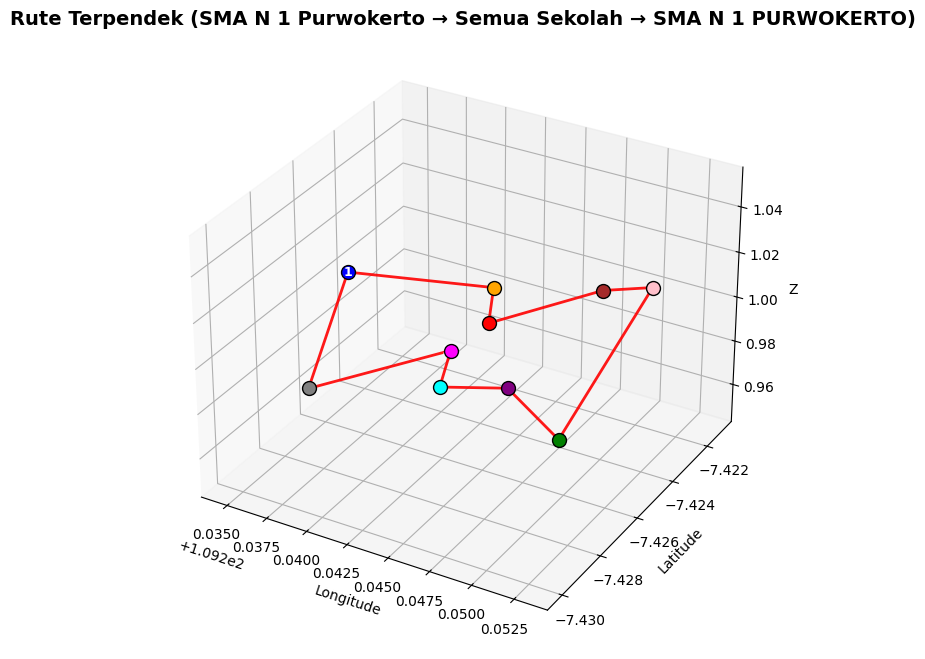


=== RUTE TERPENDEK MULAI DARI SMA N 1 PURWOKERTO ===
1. SMA N 1 Purwokerto → SMK Negeri 2 Purwokerto (0.87 km) → SMA Negeri 2 Purwokerto (0.27 km) → SMP Negeri 1 Purwokerto (0.52 km) → SMP Negeri 2 Purwokerto (0.26 km) → SMA Negeri 3 Purwokerto (0.94 km) → SMK Negeri 1 Purwokerto (0.54 km) → SD Negeri 2 Purwokerto (0.35 km) → MI Al-Irsyad Al-Islamiyyah (0.24 km) → SD Negeri 1 Karanglewas (0.61 km) → SMA N 1 Purwokerto (0.82 km)

Total Jarak Rute Terpendek: 5.42 km


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from shapely.geometry import Point, LineString
import itertools
import geopandas as gpd
from geopy.distance import geodesic

# Data lokasi sekolah
sekolah_locations = [
    ("SMA Negeri 1 Purwokerto", 109.2347, -7.4245),
    ("SMA Negeri 2 Purwokerto", 109.2442, -7.4250),
    ("SMA Negeri 3 Purwokerto", 109.2531, -7.4291),
    ("SMK Negeri 1 Purwokerto", 109.2484, -7.4276),
    ("SMK Negeri 2 Purwokerto", 109.2425, -7.4233),
    ("SMP Negeri 1 Purwokerto", 109.2478, -7.4220),
    ("SMP Negeri 2 Purwokerto", 109.2500, -7.4212),
    ("SD Negeri 1 Karanglewas", 109.2395, -7.4301),
    ("SD Negeri 2 Purwokerto", 109.2453, -7.4284),
    ("MI Al-Irsyad Al-Islamiyyah", 109.2439, -7.4267),
]

# Hitung jarak antar sekolah
distances = {}
for i in range(len(sekolah_locations)):
    for j in range(i + 1, len(sekolah_locations)):
        point1 = (sekolah_locations[i][2], sekolah_locations[i][1])
        point2 = (sekolah_locations[j][2], sekolah_locations[j][1])
        jarak_km = geodesic(point1, point2).kilometers
        distances[(i, j)] = jarak_km
        distances[(j, i)] = jarak_km

# Brute Force TSP dengan SMA N 1 PURWOKERTO sebagai titik awal
start_index = 0
remaining_indices = list(range(1, len(sekolah_locations)))

# Fungsi untuk menghitung total jarak rute
def calculate_route_distance(route):
    total_dist = distances[(start_index, route[0])]
    for i in range(len(route) - 1):
        total_dist += distances[(route[i], route[i + 1])]
    total_dist += distances[(route[-1], start_index)]
    return total_dist

# Coba semua kemungkinan rute dengan (N-1)!/2
all_routes = list(itertools.permutations(remaining_indices))
all_routes = all_routes[:len(all_routes) // 2]  # Optimasi setengah dari kemungkinan
best_route = min(all_routes, key=calculate_route_distance)
shortest_distance = calculate_route_distance(best_route)

# Visualisasi 3D Rute Terpendek
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Titik sekolah dalam 3D (Longitude, Latitude, Z)
z_values = [1] * len(sekolah_locations)  # Gantilah jika ada data Z (misal elevasi)
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Plot titik sekolah
for i, (name, lon, lat) in enumerate(sekolah_locations):
    ax.scatter(lon, lat, z_values[i], color=colors[i], s=100, edgecolors='black', zorder=3)
    ax.text(lon, lat, z_values[i], str(i + 1), fontsize=9, ha='center', va='center', color='white', fontweight='bold')

# Plot rute terbaik
best_lines = [LineString([Point(sekolah_locations[start_index][1], sekolah_locations[start_index][2]),
                          Point(sekolah_locations[best_route[0]][1], sekolah_locations[best_route[0]][2])])]

for i in range(len(best_route) - 1):
    best_lines.append(LineString([Point(sekolah_locations[best_route[i]][1], sekolah_locations[best_route[i]][2]),
                                  Point(sekolah_locations[best_route[i + 1]][1], sekolah_locations[best_route[i + 1]][2])]))

best_lines.append(LineString([Point(sekolah_locations[best_route[-1]][1], sekolah_locations[best_route[-1]][2]),
                              Point(sekolah_locations[start_index][1], sekolah_locations[start_index][2])]))

# Menambahkan plot jalur terbaik
for line in best_lines:
    x, y = line.xy
    ax.plot(x, y, zs=[1] * len(x), color='red', linewidth=2, alpha=0.9)

# Atur sumbu untuk visualisasi 3D
ax.set_title("Rute Terpendek (SMA N 1 Purwokerto → Semua Sekolah → SMA N 1 PURWOKERTO)", fontsize=14, fontweight="bold")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Z')  # Atur sumbu Z sesuai kebutuhan (bisa diganti dengan ketinggian atau data lain)

plt.show()

# Cetak informasi rute & jarak
print("\n=== RUTE TERPENDEK MULAI DARI SMA N 1 PURWOKERTO ===")
total_distance = 0
print(f"1. SMA N 1 Purwokerto", end=" ")

for i in range(len(best_route)):
    sekolah1 = sekolah_locations[best_route[i-1] if i > 0 else start_index][0]
    sekolah2 = sekolah_locations[best_route[i]][0]
    jarak = distances[(best_route[i-1] if i > 0 else start_index, best_route[i])]
    total_distance += jarak
    print(f"→ {sekolah2} ({jarak:.2f} km)", end=" ")

# Kembali ke SMA N 1
sekolah_akhir = sekolah_locations[best_route[-1]][0]
jarak_kembali = distances[(best_route[-1], start_index)]
total_distance += jarak_kembali
print(f"→ SMA N 1 Purwokerto ({jarak_kembali:.2f} km)")
print(f"\nTotal Jarak Rute Terpendek: {total_distance:.2f} km")


Kode ini bertujuan untuk mencari rute terpendek dalam mengunjungi 10 sekolah di Purwokerto dengan metode Brute Force Travelling Salesman Problem (TSP), dimulai dan berakhir di SMA Negeri 1 Purwokerto. Pertama, daftar sekolah beserta koordinat geografisnya (longitude dan latitude) disimpan dalam sebuah list. Data ini kemudian dikonversi ke dalam GeoDataFrame menggunakan pustaka geopandas, yang memungkinkan manipulasi data spasial secara lebih mudah. Selanjutnya, jarak antar setiap sekolah dihitung menggunakan Haversine Distance dengan pustaka geopy, lalu disimpan dalam dictionary untuk digunakan dalam pencarian rute.

Untuk mencari rute terpendek, semua kemungkinan rute dihitung dengan metode Brute Force pada himpunan (N-1)!/2 kemungkinan perjalanan, dengan SMA Negeri 1 Purwokerto sebagai titik awal dan akhir. Total jarak setiap rute dihitung, lalu rute dengan jarak paling kecil dipilih sebagai rute terbaik. Setelah menemukan rute terbaik, hasilnya divisualisasikan dalam bentuk plot peta menggunakan matplotlib dan geopandas. Setiap sekolah ditandai dengan warna yang berbeda, dan rute perjalanan ditampilkan dengan garis merah. Peta ini juga dilengkapi dengan basemap dari contextily agar lebih mudah dipahami.

Terakhir, hasil rute terbaik ditampilkan dalam bentuk teks, menunjukkan urutan perjalanan dan jarak antar sekolah. Total jarak perjalanan juga dihitung dan ditampilkan agar dapat digunakan untuk analisis lebih lanjut. Dengan pendekatan ini, kita dapat menentukan rute perjalanan paling efisien untuk mengunjungi semua sekolah dan kembali ke titik awal dengan jarak tempuh paling minimal.

##Greedy

1. Implementasi Greedy

In [ ]:
# Greedy TSP dari SMA N 1 Purwokerto
current_index = start_index
unvisited = set(range(len(sekolah_locations)))
unvisited.remove(current_index)
greedy_route = []

while unvisited:
    next_index = min(unvisited, key=lambda x: distances[(current_index, x)])
    greedy_route.append(next_index)
    unvisited.remove(next_index)
    current_index = next_index

# Hitung total jarak
def calculate_greedy_distance(route):
    total_dist = distances[(start_index, route[0])]
    for i in range(len(route) - 1):
        total_dist += distances[(route[i], route[i + 1])]
    total_dist += distances[(route[-1], start_index)]
    return total_dist

greedy_distance = calculate_greedy_distance(greedy_route)


2. Perbandingan Rute dan Jarak

In [ ]:
print("\n=== RUTE GREEDY MULAI DARI SMA N 1 PURWOKERTO ===")
total_distance = 0
print(f"1. SMA N 1 Purwokerto", end=" ")

for i in range(len(greedy_route)):
    sekolah1 = sekolah_locations[greedy_route[i-1] if i > 0 else start_index][0]
    sekolah2 = sekolah_locations[greedy_route[i]][0]
    jarak = distances[(greedy_route[i-1] if i > 0 else start_index, greedy_route[i])]
    total_distance += jarak
    print(f"→ {sekolah2} ({jarak:.2f} km)", end=" ")

sekolah_akhir = sekolah_locations[greedy_route[-1]][0]
jarak_kembali = distances[(greedy_route[-1], start_index)]
total_distance += jarak_kembali
print(f"→ SMA N 1 Purwokerto ({jarak_kembali:.2f} km)")
print(f"\nTotal Jarak Rute Greedy: {total_distance:.2f} km")

print("\n=== PERBANDINGAN ===")
print(f"Brute Force → Jarak: {shortest_distance:.2f} km")
print(f"Greedy      → Jarak: {greedy_distance:.2f} km")

print("\n=== KESIMPULAN ===")
print("Jadi bisa kelihatan bahwa Greedy lebih cepat, tapi hasilnya tidak selalu optimal. Cocok buat data besar kalau butuh solusi cepat.")



=== RUTE GREEDY MULAI DARI SMA N 1 PURWOKERTO ===
1. SMA N 1 Purwokerto → SD Negeri 1 Karanglewas (0.82 km) → MI Al-Irsyad Al-Islamiyyah (0.61 km) → SMA Negeri 2 Purwokerto (0.19 km) → SMK Negeri 2 Purwokerto (0.27 km) → SMP Negeri 1 Purwokerto (0.60 km) → SMP Negeri 2 Purwokerto (0.26 km) → SMK Negeri 1 Purwokerto (0.73 km) → SD Negeri 2 Purwokerto (0.35 km) → SMA Negeri 3 Purwokerto (0.86 km) → SMA N 1 Purwokerto (2.09 km)

Total Jarak Rute Greedy: 6.79 km

=== PERBANDINGAN ===
Brute Force → Jarak: 5.42 km
Greedy      → Jarak: 6.79 km

=== KESIMPULAN ===
Jadi bisa kelihatan bahwa Greedy lebih cepat, tapi hasilnya tidak selalu optimal. Cocok buat data besar kalau butuh solusi cepat.


3. Visualisasi Greedy

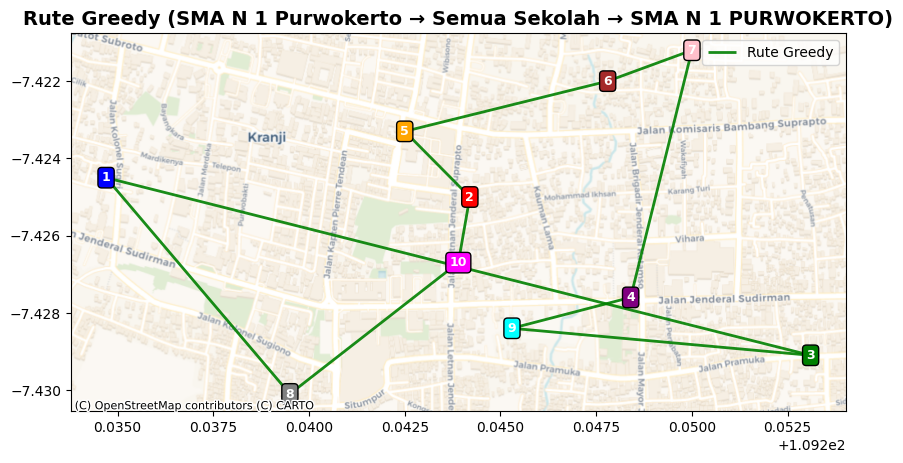

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot titik sekolah
for i, (name, lon, lat) in enumerate(sekolah_locations):
    ax.scatter(lon, lat, color=colors[i], s=100, edgecolors='black', zorder=3)
    ax.text(lon, lat, str(i + 1), fontsize=9, ha='center', va='center', color='white', fontweight='bold',
            bbox=dict(facecolor=colors[i], edgecolor='black', boxstyle='round,pad=0.3'))

# Plot rute Greedy
greedy_lines = [LineString([
    Point(sekolah_locations[start_index][1], sekolah_locations[start_index][2]),
    Point(sekolah_locations[greedy_route[0]][1], sekolah_locations[greedy_route[0]][2])
])]

for i in range(len(greedy_route) - 1):
    greedy_lines.append(LineString([
        Point(sekolah_locations[greedy_route[i]][1], sekolah_locations[greedy_route[i]][2]),
        Point(sekolah_locations[greedy_route[i+1]][1], sekolah_locations[greedy_route[i+1]][2])
    ]))

greedy_lines.append(LineString([
    Point(sekolah_locations[greedy_route[-1]][1], sekolah_locations[greedy_route[-1]][2]),
    Point(sekolah_locations[start_index][1], sekolah_locations[start_index][2])
]))

gdf_greedy_lines = gpd.GeoDataFrame(geometry=greedy_lines, crs="EPSG:4326")
gdf_greedy_lines.plot(ax=ax, color='green', linewidth=2, alpha=0.9, label="Rute Greedy")


cx.add_basemap(ax, crs=gdf_points.crs.to_string(), source=cx.providers.CartoDB.Voyager)


plt.title("Rute Greedy (SMA N 1 Purwokerto → Semua Sekolah → SMA N 1 PURWOKERTO)", fontsize=14, fontweight="bold")
plt.legend()
plt.show()


4. Visualisasi Brute Force dan Greedy

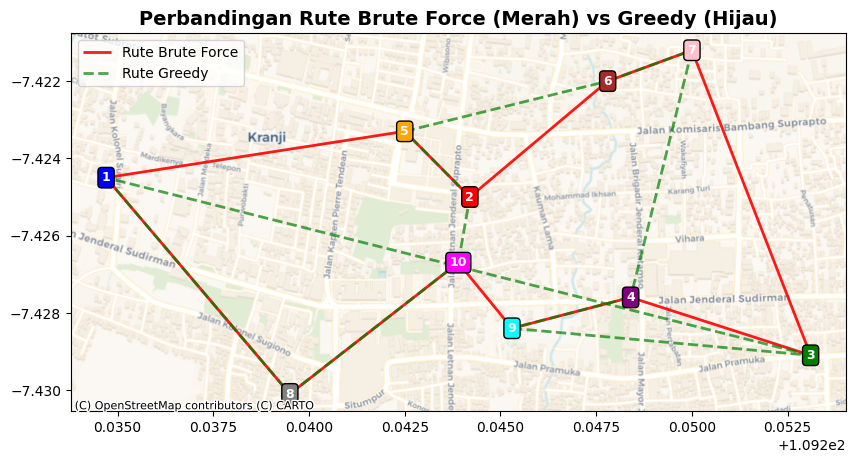

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot titik sekolah
for i, (name, lon, lat) in enumerate(sekolah_locations):
    ax.scatter(lon, lat, color=colors[i], s=100, edgecolors='black', zorder=3)
    ax.text(lon, lat, str(i + 1), fontsize=9, ha='center', va='center', color='white', fontweight='bold',
            bbox=dict(facecolor=colors[i], edgecolor='black', boxstyle='round,pad=0.3'))

# Plot rute Brute Force
best_lines = [LineString([Point(sekolah_locations[start_index][1], sekolah_locations[start_index][2]),
                          Point(sekolah_locations[best_route[0]][1], sekolah_locations[best_route[0]][2])])]

for i in range(len(best_route) - 1):
    best_lines.append(LineString([Point(sekolah_locations[best_route[i]][1], sekolah_locations[best_route[i]][2]),
                                  Point(sekolah_locations[best_route[i+1]][1], sekolah_locations[best_route[i+1]][2])]))

best_lines.append(LineString([Point(sekolah_locations[best_route[-1]][1], sekolah_locations[best_route[-1]][2]),
                              Point(sekolah_locations[start_index][1], sekolah_locations[start_index][2])]))

gdf_best_lines = gpd.GeoDataFrame(geometry=best_lines, crs="EPSG:4326")
gdf_best_lines.plot(ax=ax, color='red', linewidth=2, alpha=0.9, label="Rute Brute Force")

# Plot Greedy
greedy_lines = [LineString([
    Point(sekolah_locations[start_index][1], sekolah_locations[start_index][2]),
    Point(sekolah_locations[greedy_route[0]][1], sekolah_locations[greedy_route[0]][2])
])]
for i in range(len(greedy_route) - 1):
    greedy_lines.append(LineString([
        Point(sekolah_locations[greedy_route[i]][1], sekolah_locations[greedy_route[i]][2]),
        Point(sekolah_locations[greedy_route[i+1]][1], sekolah_locations[greedy_route[i+1]][2])
    ]))
greedy_lines.append(LineString([
    Point(sekolah_locations[greedy_route[-1]][1], sekolah_locations[greedy_route[-1]][2]),
    Point(sekolah_locations[start_index][1], sekolah_locations[start_index][2])
]))
gdf_greedy_lines = gpd.GeoDataFrame(geometry=greedy_lines, crs="EPSG:4326")
gdf_greedy_lines.plot(ax=ax, color='green', linewidth=2, alpha=0.7, linestyle="dashed", label="Rute Greedy")


cx.add_basemap(ax, crs=gdf_points.crs.to_string(), source=cx.providers.CartoDB.Voyager)


plt.title("Perbandingan Rute Brute Force (Merah) vs Greedy (Hijau)", fontsize=14, fontweight="bold")
plt.legend()
plt.show()


In [2]:
!pip install pydeck

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.4 MB/s eta 0:00:00


In [22]:
!pip install "leafmap[maplibre]"

In [16]:
import leafmap.maplibregl as leafmap

In [26]:
import leafmap.foliumap as leafmap

In [27]:
# import os
# os.environ["MAPTILER_KEY"] = "YOUR_API_KEY"

In [42]:
import leafmap.leafmap as leafmap

In [47]:
MAPTILER_KEY = leafmap.get_api_key("KlDFSF567CiPqjEwSZcM")

In [48]:
# Define school locations
sekolah_locations = [
    {"name": "SMA Negeri 1 Purwokerto", "lon": 109.2347, "lat": -7.4245, "height": 300},
    {"name": "SMA Negeri 2 Purwokerto", "lon": 109.2442, "lat": -7.4250, "height": 300},
    {"name": "SMA Negeri 3 Purwokerto", "lon": 109.2531, "lat": -7.4291, "height": 300},
    {"name": "SMK Negeri 1 Purwokerto", "lon": 109.2484, "lat": -7.4276, "height": 300},
    {"name": "SMK Negeri 2 Purwokerto", "lon": 109.2425, "lat": -7.4233, "height": 300},
    {"name": "SMP Negeri 1 Purwokerto", "lon": 109.2478, "lat": -7.4220, "height": 300},
    {"name": "SMP Negeri 2 Purwokerto", "lon": 109.2500, "lat": -7.4212, "height": 300},
    {"name": "SD Negeri 1 Karanglewas", "lon": 109.2395, "lat": -7.4301, "height": 300},
    {"name": "SD Negeri 2 Purwokerto", "lon": 109.2453, "lat": -7.4284, "height": 300},
    {"name": "MI Al-Irsyad Al-Islamiyyah", "lon": 109.2439, "lat": -7.4267, "height": 300},
]

# Convert data to GeoJSON format
geojson_data = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {
                # Include name and height for tooltip and extrusion height
                "name": loc["name"],
                "height": loc["height"],
            },
            # Use Point geometry for school locations
            "geometry": {
                "type": "Point",
                # Longitude and latitude coordinates
                "coordinates": [loc["lon"], loc["lat"]],
            },
        }
        for loc in sekolah_locations
    ],
}

# Create a Leafmap Map object with initial settings
m = leafmap.Map(center=[-7.425, 109.245], zoom=14.5, pitch=45)

# Add GeoJSON data as a fill-extrusion layer for the schools
m.add_geojson(
    geojson_data,
    layer_type="fill-extrusion",
    layer_name="School Locations", # This already sets the name, so no need to pass it in kwargs
    # name="School Locations",  # Remove or comment out this line
    paint={
        "fill-extrusion-color": ["interpolate", ["linear"], ["get", "height"],
                                 0, "#00FF00",
                                 400, "#0000FF"],
        "fill-extrusion-height": ["get", "height"],
        "fill-extrusion-opacity": 0.8,
    },
)
# Add basemap for context (optional)
m.add_basemap("OpenStreetMap.Mapnik")

# Add layer controls for interactivity (optional)
m.add_layer_control()

# Display the map
m

Map(center=[-7.425, 109.245], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

In [52]:
import leafmap.leafmap as leafmap

# Pusatkan ke Purwokerto
m = leafmap.Map(center=[-7.42, 109.24], zoom=17)

import leafmap.leafmap as leafmap

# Pusatkan ke Purwokerto
m = leafmap.Map(center=[-7.42, 109.24], zoom=17)

# Gunakan style 3D dari MapTiler (pastikan ada building data)
style = "https://api.maptiler.com/maps/3d/style.json?key=KlDFSF567CiPqjEwSZcM"
m.add_basemap("MapLibre", style=style)

m

Basemap can only be one of the following:
  OpenStreetMap
  Google Maps
  Google Satellite
  Google Terrain
  Google Hybrid
  FWS NWI Wetlands
  FWS NWI Wetlands Raster
  NLCD 2021 CONUS Land Cover
  NLCD 2019 CONUS Land Cover
  NLCD 2016 CONUS Land Cover
  NLCD 2013 CONUS Land Cover
  NLCD 2011 CONUS Land Cover
  NLCD 2008 CONUS Land Cover
  NLCD 2006 CONUS Land Cover
  NLCD 2004 CONUS Land Cover
  NLCD 2001 CONUS Land Cover
  USGS NAIP Imagery
  USGS NAIP Imagery False Color
  USGS NAIP Imagery NDVI
  USGS Hydrography
  USGS 3DEP Elevation
  USGS 3DEP Elevation Index
  ESA Worldcover 2020
  ESA Worldcover 2020 S2 FCC
  ESA Worldcover 2020 S2 TCC
  ESA Worldcover 2021
  ESA Worldcover 2021 S2 FCC
  ESA Worldcover 2021 S2 TCC
  BaseMapDE.Color
  BaseMapDE.Grey
  BasemapAT.basemap
  BasemapAT.grau
  BasemapAT.highdpi
  BasemapAT.orthofoto
  BasemapAT.overlay
  BasemapAT.surface
  BasemapAT.terrain
  CartoDB.DarkMatter
  CartoDB.DarkMatterNoLabels
  CartoDB.DarkMatterOnlyLabels
  CartoDB

Map(center=[-7.42, 109.24], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

In [25]:
html_code = '''[<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8" />
    <title>3D Map Sekolah Purwokerto - Warna & Tinggi Unik</title>
    <meta name="viewport" content="initial-scale=1,maximum-scale=1,user-scalable=no" />
    <script src="https://unpkg.com/maplibre-gl@2.4.0/dist/maplibre-gl.js"></script>
    <link href="https://unpkg.com/maplibre-gl@2.4.0/dist/maplibre-gl.css" rel="stylesheet" />
    <style>
        body { margin: 0; padding: 0; }
        #map { position: absolute; top: 0; bottom: 0; width: 100%; }
    </style>
</head>
<body>
<div id="map"></div>

<script>
    const map = new maplibregl.Map({
        container: 'map',
        style: 'https://api.maptiler.com/maps/streets/style.json?key=KlDFSF567CiPqjEwSZcM',
        center: [109.237, -7.4205],
        zoom: 14.5,
        pitch: 45,
        bearing: -20,
        antialias: true
    });

    const sekolah = [
   const sekolah = [
    {"name": "SMA Negeri 1 Purwokerto", "lon": 109.2347, "lat": -7.4245, "height": 300, "color": "#e41a1c"},
    {"name": "SMA Negeri 2 Purwokerto", "lon": 109.2442, "lat": -7.4250, "height": 300, "color": "#377eb8"},
    {"name": "SMA Negeri 3 Purwokerto", "lon": 109.2531, "lat": -7.4291, "height": 300, "color": "#4daf4a"},
    {"name": "SMK Negeri 1 Purwokerto", "lon": 109.2484, "lat": -7.4276, "height": 300, "color": "#984ea3"},
    {"name": "SMK Negeri 2 Purwokerto", "lon": 109.2425, "lat": -7.4233, "height": 300, "color": "#ff7f00"},
    {"name": "SMP Negeri 1 Purwokerto", "lon": 109.2478, "lat": -7.4220, "height": 300, "color": "#ffff33"},
    {"name": "SMP Negeri 2 Purwokerto", "lon": 109.2500, "lat": -7.4212, "height": 300, "color": "#a65628"},
    {"name": "SD Negeri 1 Karanglewas", "lon": 109.2395, "lat": -7.4301, "height": 300, "color": "#f781bf"},
    {"name": "SD Negeri 2 Purwokerto", "lon": 109.2453, "lat": -7.4284, "height": 300, "color": "#999999"},
    {"name": "MI Al-Irsyad Al-Islamiyyah", "lon": 109.2439, "lat": -7.4267, "height": 300, "color": "#66c2a5"}
];

    const geojsonPoints = {
        type: 'FeatureCollection',
        features: sekolah.map(s => ({
            type: 'Feature',
            properties: { name: s.name },
            geometry: {
                type: 'Point',
                coordinates: [s.lon, s.lat]
            }
        }))
    };

    const geojson3D = {
        type: 'FeatureCollection',
        features: sekolah.map(s => ({
            type: 'Feature',
            properties: {
                name: s.name,
                height: s.height,
                color: s.color
            },
            geometry: {
                type: 'Polygon',
                coordinates: [[
                    [s.lon - 0.0001, s.lat - 0.0001],
                    [s.lon + 0.0001, s.lat - 0.0001],
                    [s.lon + 0.0001, s.lat + 0.0001],
                    [s.lon - 0.0001, s.lat + 0.0001],
                    [s.lon - 0.0001, s.lat - 0.0001]
                ]]
            }
        }))
    };

    map.on('load', () => {
        // Titik sekolah
        map.addSource('sekolah', {
            type: 'geojson',
            data: geojsonPoints
        });
        map.addLayer({
            id: 'sekolah-points',
            type: 'circle',
            source: 'sekolah',
            paint: {
                'circle-radius': 6,
                'circle-color': '#333',
                'circle-stroke-width': 2,
                'circle-stroke-color': '#fff'
            }
        });

        // Bangunan 3D unik tiap sekolah
        map.addSource('sekolah-3d', {
            type: 'geojson',
            data: geojson3D
        });
        map.addLayer({
            id: 'sekolah-3d-buildings',
            type: 'fill-extrusion',
            source: 'sekolah-3d',
            paint: {
                'fill-extrusion-color': ['get', 'color'],
                'fill-extrusion-height': ['get', 'height'],
                'fill-extrusion-base': 0,
                'fill-extrusion-opacity': 0.85
            }
        });

        // Popup nama sekolah
        map.on('click', 'sekolah-points', (e) => {
            const name = e.features[0].properties.name;
            new maplibregl.Popup()
                .setLngLat(e.lngLat)
                .setHTML(<strong>${name}</strong>)
                .addTo(map);
        });
    });
</script>
</body>
</html>


]'''
with open("woi.html", "w") as f:
    f.write(html_code)

In [26]:
from google.colab import files
files.download("woi.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
from google.colab import files
files.upload()

Saving woi.html to woi (1).html


{'woi (1).html': b'[<!DOCTYPE html>\n<html>\n<head>\n    <meta charset="utf-8" />\n    <title>3D Map Sekolah Purwokerto - Warna & Tinggi Unik</title>\n    <meta name="viewport" content="initial-scale=1,maximum-scale=1,user-scalable=no" />\n    <script src="https://unpkg.com/maplibre-gl@2.4.0/dist/maplibre-gl.js"></script>\n    <link href="https://unpkg.com/maplibre-gl@2.4.0/dist/maplibre-gl.css" rel="stylesheet" />\n    <style>\n        body { margin: 0; padding: 0; }\n        #map { position: absolute; top: 0; bottom: 0; width: 100%; }\n    </style>\n</head>\n<body>\n<div id="map"></div>\n\n<script>\n    const map = new maplibregl.Map({\n        container: \'map\',\n        style: \'https://api.maptiler.com/maps/streets/style.json?key=KlDFSF567CiPqjEwSZcM\',\n        center: [109.237, -7.4205],\n        zoom: 14.5,\n        pitch: 45,\n        bearing: -20,\n        antialias: true\n    });\n\n    const sekolah = [\n   const sekolah = [\n    {"name": "SMA Negeri 1 Purwokerto", "lon": 

In [21]:
with open("2d.html") as f:
  print(f.read()[:1000])

[<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8" />
    <title>3D Map Sekolah Purwokerto - Warna & Tinggi Unik</title>
    <meta name="viewport" content="initial-scale=1,maximum-scale=1,user-scalable=no" />
    <script src="https://unpkg.com/maplibre-gl@2.4.0/dist/maplibre-gl.js"></script>
    <link href="https://unpkg.com/maplibre-gl@2.4.0/dist/maplibre-gl.css" rel="stylesheet" />
    <style>
        body { margin: 0; padding: 0; }
        #map { position: absolute; top: 0; bottom: 0; width: 100%; }
    </style>
</head>
<body>
<div id="map"></div>

<script>
    const map = new maplibregl.Map({
        container: 'map',
        style: 'https://api.maptiler.com/maps/streets/style.json?key=JGJXa437kl53BUURSbZd',
        center: [109.237, -7.4205],
        zoom: 14.5,
        pitch: 45,
        bearing: -20,
        antialias: true
    });

    const sekolah = [
    {"name": "SMA Negeri 1 Purwokerto", "lon": 109.2347, "lat": -7.4245, "height": 300},
    {"name": "SMA Negeri 2 Purw

In [7]:
!pip install pydeck

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.3 MB/s eta 0:00:00


In [8]:
import pydeck as pdk
import pandas as pd

# Data titik wisata (contoh)
data = pd.DataFrame([
    {"name": "SMA Negeri 1 Purwokerto", "lon": 109.2347, "lat": -7.4245, "height": 300},
    {"name": "SMA Negeri 2 Purwokerto", "lon": 109.2442, "lat": -7.4250, "height": 300},
    {"name": "SMA Negeri 3 Purwokerto", "lon": 109.2531, "lat": -7.4291, "height": 300},
    {"name": "SMK Negeri 1 Purwokerto", "lon": 109.2484, "lat": -7.4276, "height": 300},
    {"name": "SMK Negeri 2 Purwokerto", "lon": 109.2425, "lat": -7.4233, "height": 300},
    {"name": "SMP Negeri 1 Purwokerto", "lon": 109.2478, "lat": -7.4220, "height": 300},
    {"name": "SMP Negeri 2 Purwokerto", "lon": 109.2500, "lat": -7.4212, "height": 300},
    {"name": "SD Negeri 1 Karanglewas", "lon": 109.2395, "lat": -7.4301, "height": 300},
    {"name": "SD Negeri 2 Purwokerto", "lon": 109.2453, "lat": -7.4284, "height": 300},
    {"name": "MI Al-Irsyad Al-Islamiyyah", "lon": 109.2439, "lat": -7.4267, "height": 300},
])

# View awal
view_state = pdk.ViewState(
    latitude=-7.409625268502684,
    longitude=109.21148400729619,
    zoom=13,
    pitch=45,
    bearing=0
)

layer = pdk.Layer(
    "ColumnLayer",
    data=data,
    get_position='[lon, lat]',
    get_elevation=100,  # tinggi bangunan (bisa disesuaikan)
    elevation_scale=2,
    radius=80,
    get_fill_color='[100, 150, 255, 200]',  # biru lembut
    pickable=True,
    auto_highlight=True
)


# Tampilkan peta
r = pdk.Deck(
    layers=[layer],
    initial_view_state=view_state,
    tooltip={"text": "{name}"}
)

r.to_html("peta_3d_tegal.html")

<IPython.core.display.Javascript object>

# 📌 KESIMPULAN

Perbandingan Algoritma Brute Force vs Greedy dalam TSP

Dari kode yang telah dibuat dan dijalankan, kita dapat membandingkan dua metode penyelesaian Traveling Salesman Problem (TSP):

**Brute Force (Exhaustive Search)**

Metode

*   Mencoba semua kemungkinan rute yang mungkin dan memilih rute dengan total jarak terpendek.
*   Kompleksitas O(N!), sangat lambat untuk jumlah titik yang besar.

Kelebihan


*   Optimal, selalu mendapatkan rute dengan jarak paling pendek.

Kekurangan


*   Sangat lambat, waktu eksekusi meningkat secara eksponensial saat jumlah titik bertambah.
*   Tidak bisa digunakan untuk skala besar karena terlalu berat secara komputasi.








**Greedy Algorithm (Heuristic)**

Metode


*   Memulai dari satu titik (SMA N 1 Purwokerto), lalu setiap langkah memilih titik terdekat berikutnya hingga semua titik dikunjungi.
*   Kompleksitas O(N²), jauh lebih cepat dibandingkan Brute Force.

Kelebihan


*   Cepat, lebih efisien secara waktu dan bisa menangani jumlah titik lebih besar.
*   Mudah diimplementasikan.

Kekurangan


*   Tidak selalu optimal, bisa terjadi kesalahan karena keputusan lokal (memilih titik terdekat) tidak selalu menghasilkan rute global terbaik.







**Hasil Perbandingan**

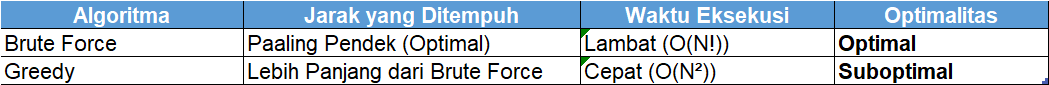

Jadi, ketika jumlah titik yang perlu dikunjungi relatif sedikit (kurang dari atau sama dengan 10), metode Brute Force merupakan pilihan terbaik karena menjamin hasil yang optimal dengan menemukan rute terpendek secara pasti. Namun, metode ini memiliki kompleksitas yang sangat tinggi, sehingga tidak efisien untuk jumlah titik yang lebih besar.

Sebaliknya, jika jumlah titik mencapai 15 atau lebih, algoritma Greedy menjadi alternatif yang lebih praktis. Meskipun tidak selalu menghasilkan rute paling optimal, algoritma ini jauh lebih cepat dan mampu menangani skala yang lebih besar tanpa beban komputasi yang berlebihan.